<div class="alert alert-block alert-danger">

#### Student Name: Anon Pipatpakin
#### Student ID: 33366829
# Model Complexity and Models Selection
    

</div>

<div class="alert alert-block alert-info">
    
## Libaries and train test split

</div>

In [1]:
# use train test split from the class
def train_test_split(x, y, train_size=0.6, random_state=None):
    RNG = np.random.default_rng(random_state)
    N = len(x)
    N_train = round(N*train_size)
    idx_train = RNG.choice(N, N_train, replace=False)
    idx_test = np.setdiff1d(np.arange(N), idx_train)
    RNG.shuffle(idx_test)
    return x[idx_train], x[idx_test], y[idx_train], y[idx_test]

In [2]:
# Import libaries
from sklearn.base import BaseEstimator
from scipy.spatial import KDTree
import numpy as np
from sklearn.datasets import load_diabetes, fetch_california_housing
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Qestion 1](#Question1) <br>
[2. Qestion 2](#Question2) <br>
[3. Qestion 3](#Question3) <br>

<div class="alert alert-block alert-success">
    
## Question 1  <a class="anchor" name="Question1"></a>

**I.** Implement a KNN regressor using the scikit-learn conventations, i.e., in a class with the
following skeleton.

In [3]:
class KnnRegressor:
    def __init__(self, k):
        self.k = k
        
    def fit(self, x, y):
        self.y_train_ = y
        # use kdtree to help finding the closest point
        self.x_train_kdtree_ = KDTree(x)
        return self
        
    def predict(self, x):
        # query for k nearest neighbours indexies
        _, neighbours_index = self.x_train_kdtree_.query(x, k=self.k)
        neighbours_index = neighbours_index.reshape(len(x), self.k)
        # get y particular x
        neighbours_labels = self.y_train_[neighbours_index]
        # average the target
        neigbours_avg = np.mean(neighbours_labels, axis=1)
        return neigbours_avg

**II.** To test your implementation, load the datasets diabetes and california housing through
the functions load diabetes and fetch california housing, both of which are available
in the module sklearn.datasets. For both datasets, perform a training/test split (using a
fraction of 0.6 of the data as training data), fit your KNN regressor to the training portion
(using some guess for a good value of k), and report the training and test errors.

**Diabetes dataset**

In [4]:
# load diabetes dataset
diabetes_features = load_diabetes().data
diabetes_target = load_diabetes().target

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(diabetes_features, diabetes_target, train_size=0.6, random_state=1)

In [6]:
# store error train and test
error_train = []
error_test = []

max_k = 10
for k in range(1, max_k+1):
    knn_regressor = KnnRegressor(k).fit(x_train, y_train) 
    error_train.append(mean_squared_error(y_train, knn_regressor.predict(x_train)))
    error_test.append(mean_squared_error(y_test, knn_regressor.predict(x_test)))

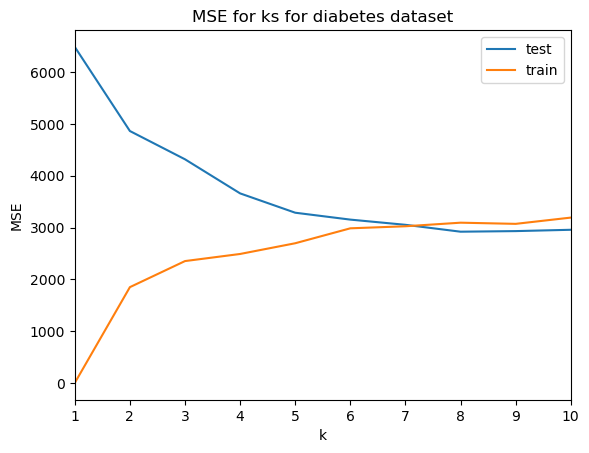

In [7]:
# plotting train and test errors

ks = np.arange(1, max_k+1)
plt.plot(ks, error_test, label='test')
plt.plot(ks, error_train, label='train')
plt.margins(x=0)
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.margins(x=0)
plt.title('MSE for ks for diabetes dataset')
plt.show()

According to the plot between MSE and different k, we can see that the best k that reduce generalisation gap is at $k=7$.

**California housing dataset**

In [8]:
# load data
housing_features = fetch_california_housing().data
housing_target = fetch_california_housing().target

In [9]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(housing_features, housing_target, train_size=0.6, random_state=1)

In [10]:
# training and tesing errors
error_train = []
error_test = []

max_k = 10
for k in range(1, max_k+1):
    knn_regressor = KnnRegressor(k).fit(x_train, y_train) 
    error_train.append(mean_squared_error(y_train, knn_regressor.predict(x_train)))
    error_test.append(mean_squared_error(y_test, knn_regressor.predict(x_test)))

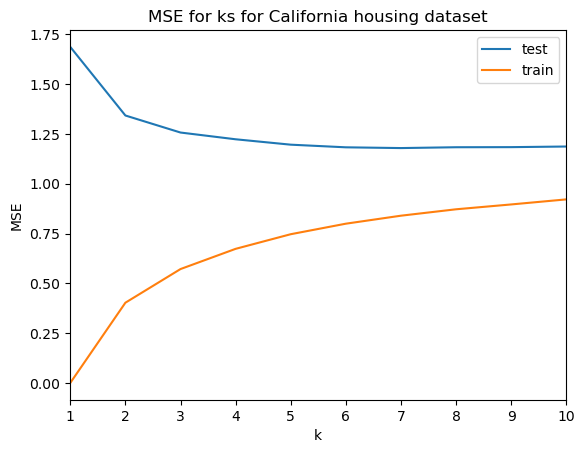

In [11]:
# plotting train and test errors

ks = np.arange(1, max_k+1)
plt.plot(ks, error_test, label='test')
plt.plot(ks, error_train, label='train')
plt.margins(x=0)
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.margins(x=0)
plt.title('MSE for ks for California housing dataset')
plt.show()

At $k = 6$, the gap between training and testing MSE is small and the changing rate is decrease. Consider about the computational cost, $k=6$ would be the best $k$ for the dataset.

<div class="alert alert-block alert-success">
    
## Question 2  <a class="anchor" name="Question2"></a>

**I.** Implement a L-Fold Cross Validation (CV) scheme using the scikit-learn convention for
data splitters, i.e., using the following skeleton.

In [12]:
class LFold:
    
    def __init__(self, l):
        # l is the number of folds
        self.l = l
    
    # return the number of folds
    def get_n_splits(self, x= None, y= None, groups= None):
        return self.l
        
    
    # spliting the data
    def split(self, x, y= None, groups= None):
        # number of idx
        n = len(x)   
        # get fold size 
        fold_size = n // self.l 
        
        remain = n % self.l
        data_idx = list(range(0, n))
        
        start = 0
        for i in range(self.l):
            if i < remain:
                # give one element to first n fold
                end = start + fold_size + 1
               
                
            else:
                end = start + fold_size
               
            
            test_idx = data_idx[start:end]
            train_idx = np.setdiff1d(list(range(n)), test_idx)
            
            # up date the start index
            start = end 
            
            yield train_idx, test_idx

In [13]:
for idx_train, idx_test in LFold(5).split(list(range(20))):
    print(idx_train, idx_test)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0, 1, 2, 3]
[ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4, 5, 6, 7]
[ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [8, 9, 10, 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12, 13, 14, 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16, 17, 18, 19]


-------------------

**II.** 
For both datasets from Question 1, use your L-fold CV implementation to systematically test
the effect of the KNN parameter K by testing all options from 1 to 50 and, for each K, instead
of only performing a single training/test split run your L-Fold CV. For each K compute the
mean and standard deviation of the mean squared error (training and test) across the L folds
and report the K for which you found the best test performance (for both datasets).
Hint: To avoid code duplication and name clashes, consider creating a function or class that,
given some generic input dataset, encapsulates the experiment of performing the cross validation for each candidate K and stores/returns the results in an appropriate data structure.


In [14]:
# function to find best K in KnnRegressor
def best_k(x, y, max_k=1, fold_number= 1):
    # get features data
    features = x
    # get target data 
    target = y
    # find number of records 
    n = len(features)
    
    # listionary for train
    train_mse_list = list()
    train_std_list = list()
    
    # listionary for test
    test_mse_list = list()
    test_std_list = list()
    
    # find value for each k
    for k in range(1, max_k+1):
        error_train = []
        error_test = []  
        # split data according to number of folds
        for idx_train, idx_test in LFold(fold_number).split(list(range(n))):

            x_train = features[idx_train]
            y_train = target[idx_train]

            x_test = features[idx_test]
            y_test = target[idx_test]
            
            # train and test for each k
            knn_regressor = KnnRegressor(k).fit(x_train, y_train) 
            error_train.append(mean_squared_error(y_train, knn_regressor.predict(x_train)))
            error_test.append(mean_squared_error(y_test, knn_regressor.predict(x_test)))
            
        # calcuate mean of mse for each k
        mse_mean_train = np.mean(error_train)
        mse_mean_test = np.mean(error_test)
        
        # calculate std of mse for each k
        mse_std_train = np.std(error_train)
        mse_std_test = np.std(error_test)
        
        # store values to lists 
        train_mse_list.append(mse_mean_train)
        test_mse_list.append(mse_mean_test)
        
        train_std_list.append(mse_std_train)
        test_std_list.append(mse_std_test)
        
    # find best k based on test mse
    best_k = np.argmin(test_mse_list) + 1
    min_mse_test = test_mse_list[best_k - 1]
    
    return [best_k, min_mse_test, train_mse_list, test_mse_list, train_std_list, test_std_list]

In [15]:
# best k for diabetes
dia_k, dia_min_test, dia_train_mse, dia_test_mse, dia_train_std, dia_test_std = best_k(diabetes_features, diabetes_target, max_k=50, fold_number=5)

In [16]:
print(f'Best K for diabetes datasets is: {dia_k}')
print(f'With minimum MSE: {dia_min_test}')

Best K for diabetes datasets is: 19
With minimum MSE: 3172.3750023343396


In [17]:
house_k, house_min_test, house_train_mse, house_test_mse, house_train_std, house_test_std = best_k(housing_features, housing_target, max_k=50, fold_number=5)

In [18]:
print(f'Best K for California Housing datasets is: {house_k}')
print(f'With minimum MSE: {house_min_test}')

Best K for California Housing datasets is: 10
With minimum MSE: 1.216878762224671


---------------------

**III.** For both datasets, plot the mean training and test errors against the choice of K with error
bars (using the standard error of the mean). You can compute the standard error of the
means as

\begin{equation}
ste = \frac{1.96s}{\sqrt{L}}
\end{equation}

where s is the sample standard deviation of the error across the L folds. Based on this plot,
comment on
– The effect of the parameter K. For both datasets, identify regions of overfitting and
underfitting for the KNN model.

**Diabetes dataset**

In [19]:
# define different size of L
l_size = [5, 10, 15, 20]

dia_train_mse_results_lsize = []
dia_test_mse_results_lsize = []

dia_train_std_results_lsize = []
dia_test_std_results_lsize = []

max_k = 50

In [20]:
# [best_k, min_mse_test, train_mse_list, test_mse_list, train_std_list, test_std_list]
for size in l_size:
    results_list = best_k(diabetes_features, diabetes_target, max_k=max_k, fold_number=size)
    dia_train_mse_results_lsize.append(np.array(results_list[2]))
    dia_test_mse_results_lsize.append(np.array(results_list[3]))
    dia_train_std_results_lsize.append(np.array(results_list[4]))
    dia_test_std_results_lsize.append(np.array(results_list[5]))

In [21]:
dia_best_ks = [np.argmin(dia_test_mse_results_lsize[i]) + 1 for i in range(len(dia_test_mse_results_lsize))]

In [22]:
dia_best_ks

[19, 19, 19, 18]

In [23]:
dia_train_mean_std = [np.mean(array) for array in dia_train_std_results_lsize]

In [24]:
dia_test_mean_std = [np.mean(array) for array in dia_test_std_results_lsize]

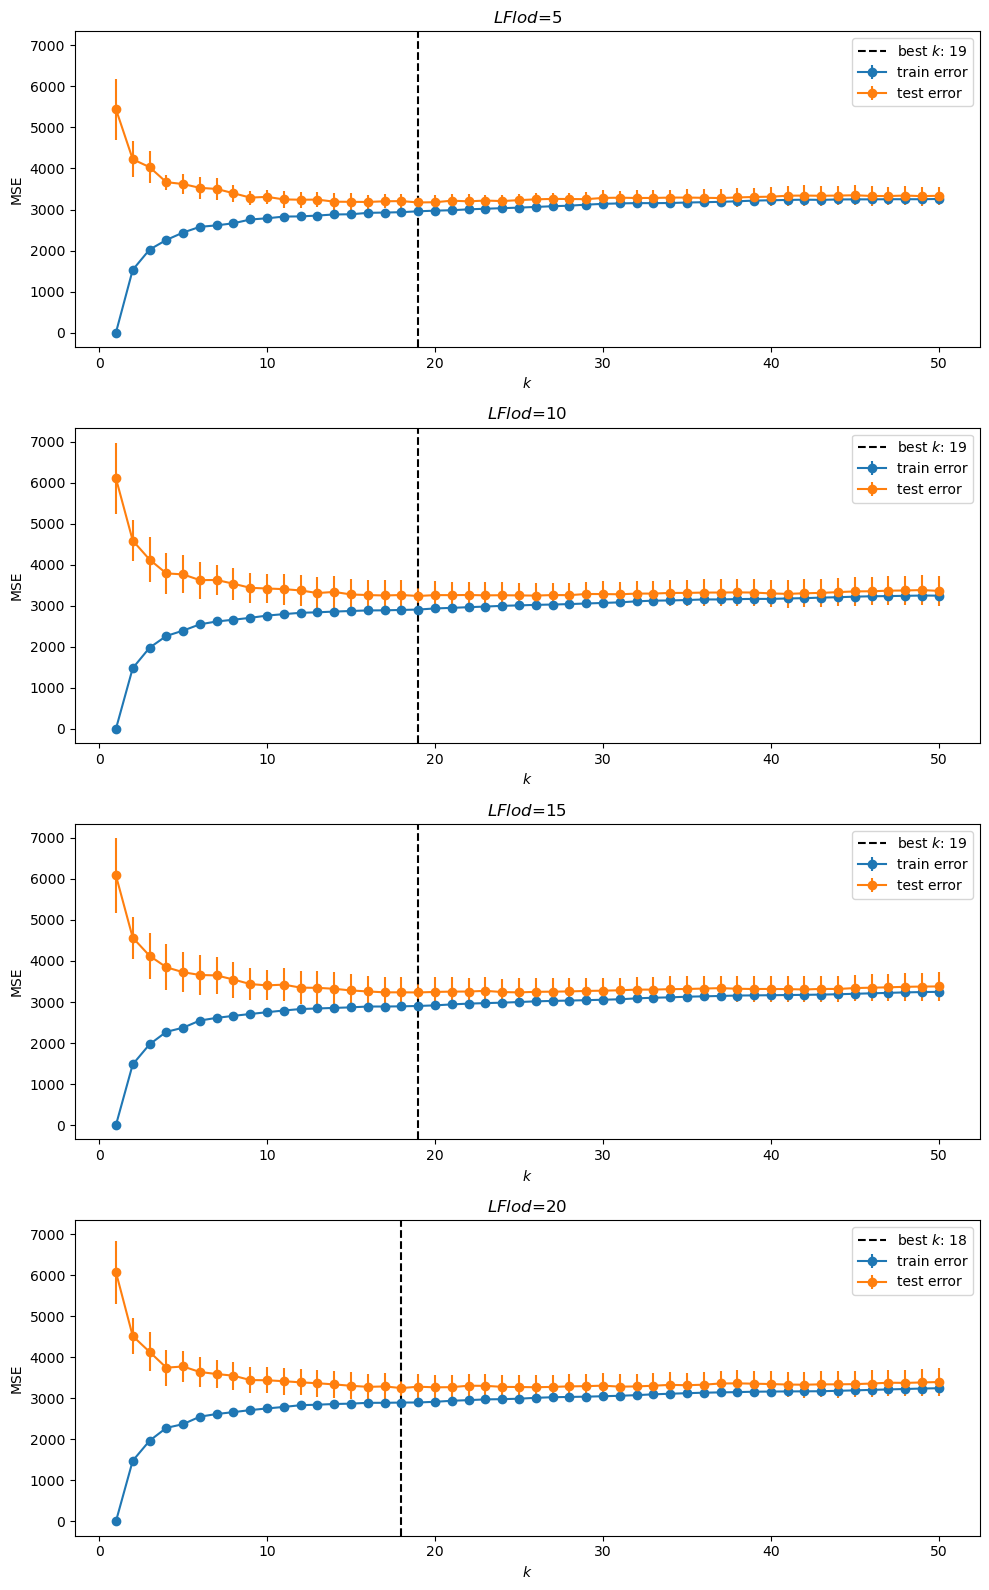

In [25]:
ks = np.arange(1, max_k+1)
_, axs = plt.subplots(len(l_size), 1, figsize=(10, 4*len(l_size)), tight_layout=True, sharey=True)

for i, size in enumerate(l_size):
    train_ste =  (1.96 * dia_train_std_results_lsize[i]) / np.sqrt(size)
    test_ste = (1.96 * dia_test_std_results_lsize[i]) / np.sqrt(size)
    
    
    axs[i].set_title(f'$LFlod$={size}')
    axs[i].errorbar(ks, dia_train_mse_results_lsize[i], yerr= train_ste, marker='o', label='train error')
    axs[i].errorbar(ks, dia_test_mse_results_lsize[i], yerr=test_ste, marker='o', label='test error')
    axs[i].axvline(dia_best_ks[i], color='black', linestyle='--', label=f'best $k$: {dia_best_ks[i]}')
    axs[i].set_xlabel('$k$')
    
    axs[i].legend()    
    axs[i].set_ylabel('MSE')
plt.show()

**California housing dataset**

In [26]:
# define different size of L
l_size = [5, 10, 15, 20]

house_train_mse_results_lsize = []
house_test_mse_results_lsize = []

house_train_std_results_lsize = []
house_test_std_results_lsize = []

max_k = 50

In [27]:
# [best_k, min_mse_test, train_mse_list, test_mse_list, train_std_list, test_std_list]
for size in l_size:
    results_list = best_k(housing_features, housing_target, max_k=max_k, fold_number=size)
    
    house_train_mse_results_lsize.append(np.array(results_list[2]))
    house_test_mse_results_lsize.append(np.array(results_list[3]))
    house_train_std_results_lsize.append(np.array(results_list[4]))
    house_test_std_results_lsize.append(np.array(results_list[5]))

In [28]:
housing_best_ks = [np.argmin(house_test_mse_results_lsize[i]) + 1 for i in range(len(house_test_mse_results_lsize))]

In [29]:
house_train_mean_std = [np.mean(array) for array in house_train_std_results_lsize]

In [30]:
house_test_mean_std = [np.mean(array) for array in house_test_std_results_lsize]

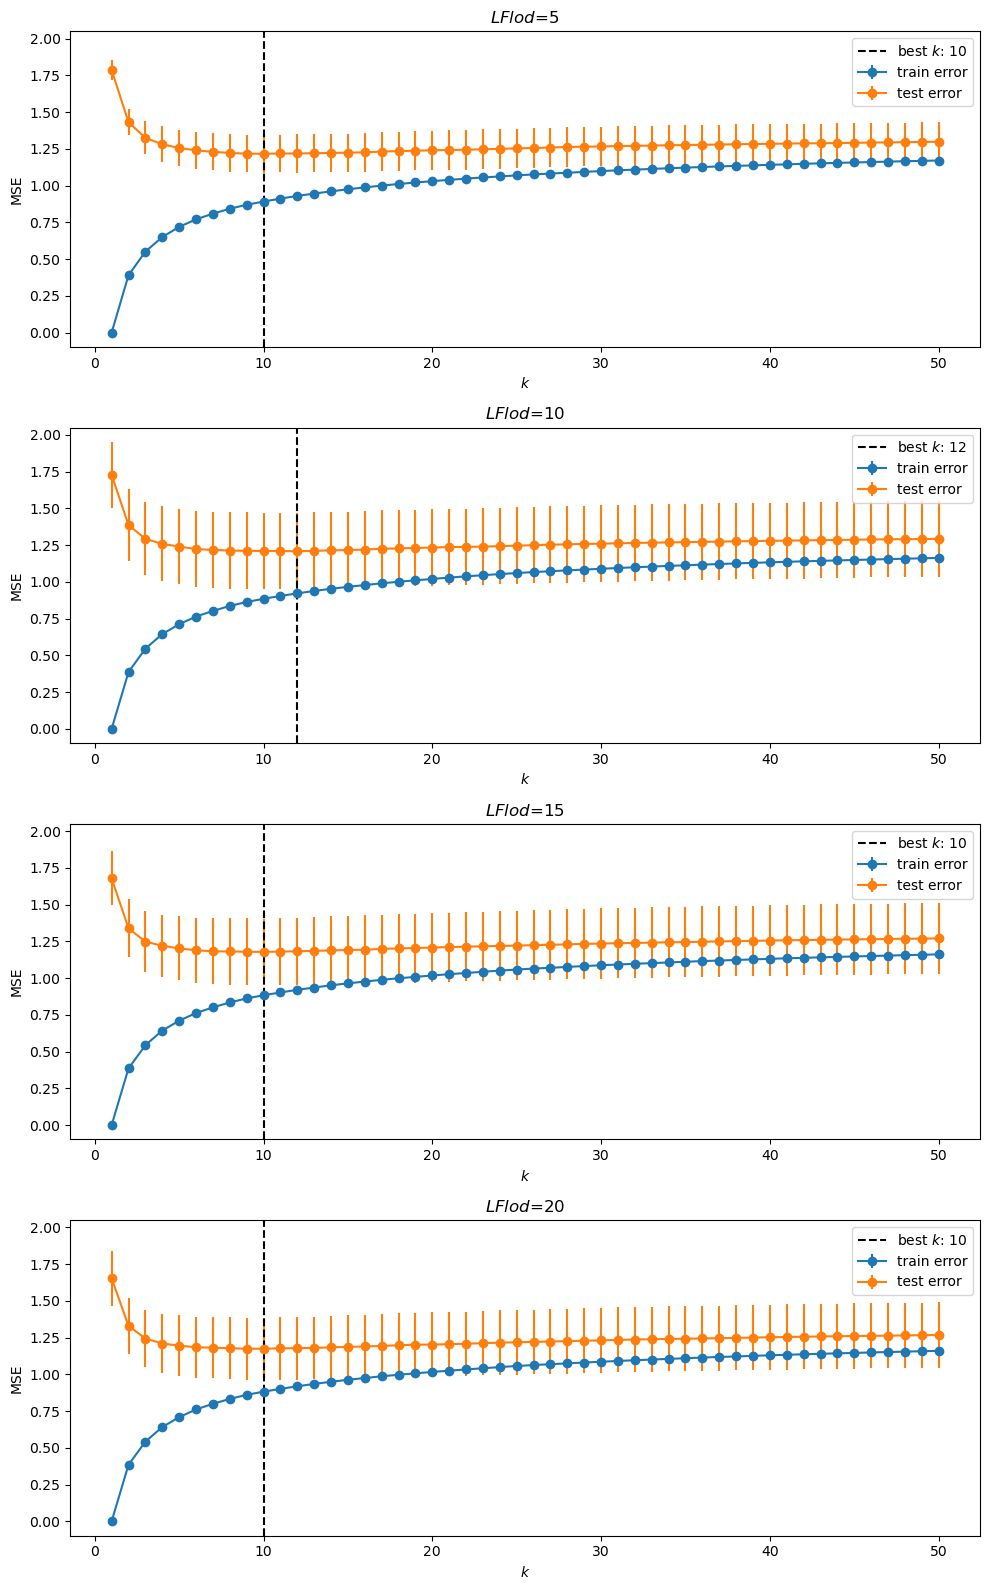

In [31]:
ks = np.arange(1, max_k+1)
_, axs = plt.subplots(len(l_size), 1, figsize=(10, 4*len(l_size)), tight_layout=True, sharey=True)

for i, size in enumerate(l_size):
    train_ste =  (1.96 * house_train_std_results_lsize[i]) / np.sqrt(size)
    test_ste = (1.96 * house_test_std_results_lsize[i]) / np.sqrt(size)
    
    
    axs[i].set_title(f'$LFlod$={size}')
    axs[i].errorbar(ks, house_train_mse_results_lsize[i], yerr= train_ste, marker='o', label='train error')
    axs[i].errorbar(ks, house_test_mse_results_lsize[i], yerr=test_ste, marker='o', label='test error')
    axs[i].axvline(housing_best_ks[i], color='black', linestyle='--', label=f'best $k$: {housing_best_ks[i]}')
    axs[i].set_xlabel('$k$')
    
    axs[i].legend()    
    axs[i].set_ylabel('MSE')
plt.show()

**Answer**

**Ks effect**

With **small number of K**, the models fitted well on training dataset(flexible) and poorly on testing dataset which is the sign of overfitting issue. With **lagrer K**, we can see that the generalisation gap is getting small but MSE is increase slightly(inflexible), hence at lagre Ks, underfitting issue will appear.

**LFold effect**

With small LFold means a small size of training dataset and large test dataset. So, when LFold is samll, the standard diviation of mean of training will be large and testing will be small. When LFold is large, standard diveiation of mean of training will be small and testing will be large which we can see from the mean of standard diviation of both testing and training for different LFold as follow:

In [32]:
for i, mean in enumerate(dia_train_mean_std):
    print(f'With {(i+1) * 5} LFold, mean std of diabetes is {round(mean, 2)}')

With 5 LFold, mean std of diabetes is 59.19
With 10 LFold, mean std of diabetes is 50.48
With 15 LFold, mean std of diabetes is 48.86
With 20 LFold, mean std of diabetes is 35.9


In [33]:
for i, mean in enumerate(dia_test_mean_std):
    print(f'With {(i+1) * 5}LFold, mean std of diabetes is {round(mean, 2)}')

With 5LFold, mean std of diabetes is 250.08
With 10LFold, mean std of diabetes is 590.04
With 15LFold, mean std of diabetes is 738.82
With 20LFold, mean std of diabetes is 753.66


In [34]:
for i, mean in enumerate(house_train_mean_std):
    print(f'With {(i+1) * 5}LFold, mean std of housing is {round(mean, 2)}')

With 5LFold, mean std of housing is 0.03
With 10LFold, mean std of housing is 0.03
With 15LFold, mean std of housing is 0.02
With 20LFold, mean std of housing is 0.02


In [35]:
for i, mean in enumerate(house_test_mean_std):
    print(f'With {(i+1) * 5}LFold, mean std of housing is {round(mean, 2)}')

With 5LFold, mean std of housing is 0.15
With 10LFold, mean std of housing is 0.42
With 15LFold, mean std of housing is 0.46
With 20LFold, mean std of housing is 0.49


<div class="alert alert-block alert-success">
    
## Question 3  <a class="anchor" name="Question3"></a>

**I.** Implement a version of the KNN regressor that automatically chooses an appropriate value
of K from a list of options by performing an internal cross-validation on the training set at
fitting time. As usually, use the scikit-learn paradigm, i.e., use the following template

In [36]:
# innner loop cv
class KnnRegressorCV(BaseEstimator):
    def __init__(self, ks=list(range(1, 21)), cv= LFold(5)):
        self.ks_ = ks
        self.cv = cv
        
    def fit(self, x, y):
        # get data
        features = x
        target = y
        self.k_ = best_k(x= x, y= y, max_k=max(self.ks_), fold_number= self.cv.get_n_splits())[0]
        # retrain model with best k
        self.best_k_model = KnnRegressor(self.k_).fit(x, y)
        return self
    
    def get_best_k(self):
        return self.k_
    
    def predict(self, x):
        y_hat = self.best_k_model.predict(x)
        return y_hat

-------------------------

**II.** For both datasets from the previous questions, test your KNN regressor with internal CV by
using either an outer single train/test-split or, ideally, with an outer cross-validation (resulting
in a so-called nested cross-validation scheme). See Fig. 1 for a further explanations.

**Diabetes**

In [37]:
# separate data of diabetes using LFold
# outer + inner = 5 Fold

# create list for storing best k form each inner loop
best_k_inner = []
mse_outer = []


# define outer loop and inner loop 
for train_idx, test_idx in LFold(5).split(diabetes_features):
    # find best k from inner loop
    knnCV = KnnRegressorCV()
    
    # best k for each inner fold 
    inner_model_i = knnCV.fit(x=diabetes_features[train_idx], y= diabetes_target[train_idx])
    best_k_inner_i = inner_model_i.get_best_k()
    
    
    # test on outer loop find best k and mse
    mse_outer_i = mean_squared_error(diabetes_target[test_idx], inner_model_i.predict(diabetes_features[test_idx]))
    
    best_k_inner.append(best_k_inner_i)
    mse_outer.append(mse_outer_i)

In [38]:
# best k inner 
best_k_inner

[18, 17, 12, 18, 19]

In [39]:
# mean of MSE for inner loop
print(f'Mean of Ks from inner loops {np.mean(best_k_inner)}')

Mean of Ks from inner loops 16.8


In [40]:
mse_outer

[3365.91468997087,
 3239.704055052292,
 3518.0419823232323,
 2874.156530583614,
 3084.4355955678675]

In [41]:
# best k from outer, choosing by least MSE
print(f'Best K from outer loop {best_k_inner[np.argmin(mse_outer)]}')

Best K from outer loop 18


**California housing**

In [42]:
# separate data of housing using LFold
# outer + inner = 5 Fold

# create list for storing best k form each inner loop
best_k_inner = []
mse_outer = []


# define outer loop and inner loop 
for train_idx, test_idx in LFold(5).split(housing_features):
    # find best k from inner loop
    knnCV = KnnRegressorCV()
    
    # best k for each inner fold 
    inner_model_i = knnCV.fit(x=housing_features[train_idx], y= housing_target[train_idx])
    best_k_inner_i = inner_model_i.get_best_k()
    
    
    # test on outer loop find best k and mse
    mse_outer_i = mean_squared_error(housing_target[test_idx], inner_model_i.predict(housing_features[test_idx]))
    
    best_k_inner.append(best_k_inner_i)
    mse_outer.append(mse_outer_i)

In [43]:
# best k inner 
best_k_inner

[9, 10, 11, 8, 10]

In [44]:
# mean of MSE for inner loop
print(f'Mean of Ks from inner loops {np.mean(best_k_inner)}')

Mean of Ks from inner loops 9.6


In [45]:
# best k from outer, choosing by least MSE
print(f'Best K from outer loop {best_k_inner[np.argmin(mse_outer)]}')

Best K from outer loop 10


**Answer**

Form above, we can see that both of means of inner Ks from Diabetes and housing dataset are differnt from best k from the outer loops. The internal cross-validatation will select best K sucessfully when it has the least MSE testing error among other internl loops.